### Initial EDA

##### This is the notebook for our exploratory data analysis, we will produce various visualizations to draw trends from the data

In [1]:
# Import pyplot for plotting
import matplotlib.pyplot as plt
# Customary to import NumPy as np
# Import numpy to generate some dummy data if necessary
import numpy as np 
# Import Pandas under the alias pd
import pandas as pd
# Import seaborn and set the standard alias of sns
import seaborn as sns
# Set so that our visualizations appear in the notebook and note as seprate files
%matplotlib inline

In [2]:
# Import the data into a Pandas DataFrame
df = pd.read_csv('../data/BankChurners.csv')

In [3]:
#Returns the number of columns in a DataFrame
len((df.columns))

23

In [4]:
#Displays first 5 rows of the DataFrame 
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
#Drops last two columns of the DataFrame 
#Removes column CLIENTNUM
df = df.drop(df.columns[-2:], axis=1)
df = df.drop(["CLIENTNUM"], axis=1)

In [6]:
#Returns the number of columns in a DataFrame
len(df.columns)

20

In [7]:
#Counts the occurance of each unique value in attrition_flag column
df["Attrition_Flag"].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [8]:
# Existing Customer will be 1 and Attrited Customer will be 0 - Check this on friday meeting

df["Attrition_Flag"] = df["Attrition_Flag"].map({'Existing Customer': 1, 'Attrited Customer': 0})

In [9]:
#Counts the occurance of each unique value in attrition_flag column
df["Attrition_Flag"].value_counts()

Attrition_Flag
1    8500
0    1627
Name: count, dtype: int64

In [10]:
#Y  is target variable, everything else is X
y = df["Attrition_Flag"]
X = df.drop(["Attrition_Flag"], axis=1)

In [11]:
#Returns description of data in DataFrame
df.describe()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,1.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,1.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,1.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [12]:
#Prints a summary of DataFrame
#Includes dtype, columns dtypes, non-null values
#Includes the total number of entries and each attribute's type and number of non-null values
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [13]:
#Counts the occurance of each unique value in Gender column
df["Gender"].value_counts(normalize=True)

Gender
F    0.529081
M    0.470919
Name: proportion, dtype: float64

In [14]:
#Counts the occurance of each unique value in Education_Level column
df["Education_Level"].value_counts(normalize=True)

Education_Level
Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: proportion, dtype: float64

In [15]:
#Counts the occurance of each unique value in Marital_Status column
df["Marital_Status"].value_counts(normalize=True)

Marital_Status
Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: proportion, dtype: float64

In [16]:
#Counts the occurance of each unique value in Income_Category column
df["Income_Category"].value_counts(normalize=True)

Income_Category
Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
Unknown           0.109805
$120K +           0.071788
Name: proportion, dtype: float64

In [17]:
#Counts the occurance of each unique value in Card_Category column
df["Card_Category"].value_counts(normalize=True)

Card_Category
Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: proportion, dtype: float64

In [18]:
#Counts occurance of each unqiue value in variable Y
y.value_counts() # Note: imbalance within the target data, will need to be handled

Attrition_Flag
1    8500
0    1627
Name: count, dtype: int64

(array([1627.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        8500.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

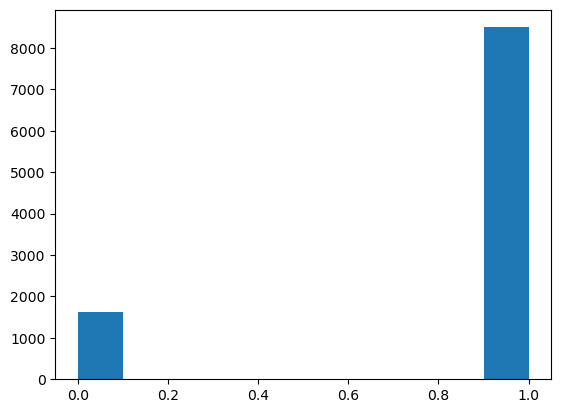

In [19]:
#Creates histogram of the values in the variable Y
plt.hist(y)

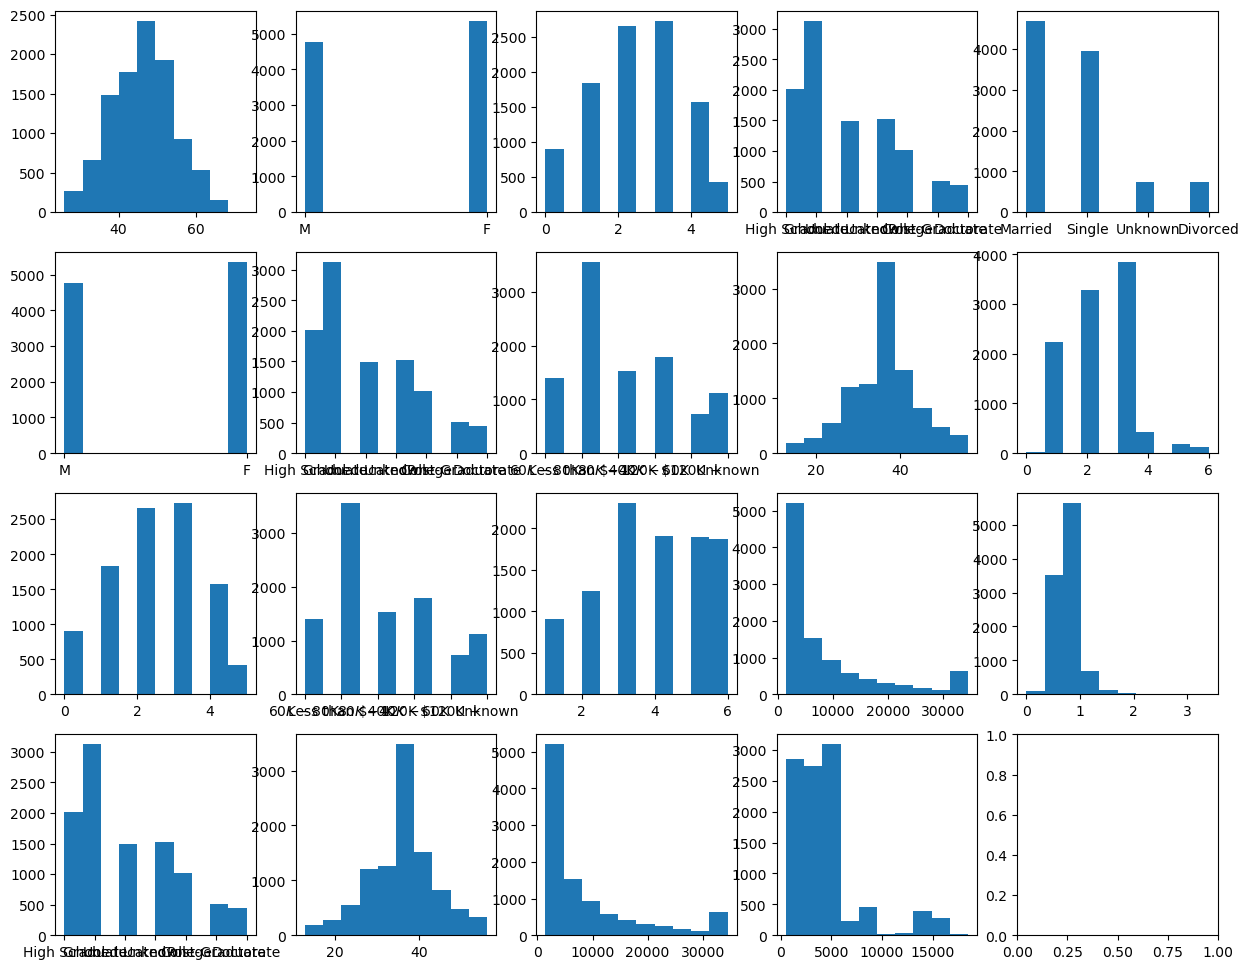

In [20]:
# Create a subplot grid of 4 rows and 5 columns, with a specified figure size of 15x12
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(15,12))

# Loop through the number of columns (from 1 to 5)
for i in range(1,6):
    # Loop through the number of rows (from 1 to 4)
    for j in range(1,5):
        # If we reach the last subplot in the grid (5th column, 4th row), break the loop
        if i == 5 and j == 4:
            break
        # For each subplot, plot a histogram of the data from the corresponding column in X dataframe
        # The column index for the data is calculated as (i*j)-1
        ax[j-1][i-1].hist(X[X.columns[(i*j) - 1]])

### Next Step: Feature Selection

### Model Selection:

Supervised:
Baseline - Logistic Regression
Naive Bayes
Decision Tree / Random Forest (hard to interpret)

Unsupervised:
SVM (if time permits)
KNN

In [21]:
#Importing all necessary libraries for use
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder #OneHotEncoder from scikit-learn (documentation here) can be used to convert categorical variables into dummy one-hot encoded variables:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

In [22]:
#Split dataset into training and testing sets. X is the feature set, y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
#Displays the data type of each column in the DataFrame 
X.dtypes 

Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [24]:
# Define a list of column names that represent categorical features in the dataset
categorical_features = ['Gender','Education_Level', 'Marital_Status','Income_Category','Card_Category']
# Create a new DataFrame 'X_train_categorical' that includes only the categorical columns from the training data
X_train_categorical = X_train[categorical_features].copy()
# Display the 'X_train_categorical' DataFrame
X_train_categorical

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
6780,F,Uneducated,Single,$40K - $60K,Blue
4555,M,Unknown,Married,$120K +,Blue
811,M,Unknown,Divorced,$60K - $80K,Blue
1940,M,Graduate,Divorced,$40K - $60K,Blue
6658,F,High School,Single,Less than $40K,Blue
...,...,...,...,...,...
9225,M,Unknown,Single,$60K - $80K,Blue
4859,M,Uneducated,Single,$60K - $80K,Blue
3264,M,Unknown,Single,$60K - $80K,Blue
9845,M,College,Married,$120K +,Blue


In [25]:
# Initialize a OneHotEncoder from sklearn's preprocessing module
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
# Fit the one hot encoder model
ohe.fit(X_train_categorical)
# Transform the categorical columns in the training data into one-hot encoded columns
X_train_ohe = pd.DataFrame(
     # Transform the categorical data into one-hot encoded format
    ohe.transform(X_train_categorical),
    index=X_train_categorical.index,
    # Create column names for the one-hot encoded columns by stacking the categories from each original column
    columns=np.hstack(ohe.categories_)
)
# Display the newly created DataFrame 'X_train_ohe'
X_train_ohe.drop(["Unknown"], axis=1, inplace=True) # Drops all of the Unknown categories as these will serve as our base case for that individual encoded category

# Display the newly created DataFrame 'X_train_ohe'


c:\Users\ajarcik\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
#Displays the column names of the DataFrame
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [27]:
#Define a list of column names that represent numeric features in the dataset
numeric_features = ['Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
# Create a new DataFrame 'X_train_numeric' that includes only the numeric columns from the training data
X_train_numeric = X_train[numeric_features].copy()
# Display the 'X_train_numeric' DataFrame
X_train_numeric

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6780,47,3,35,6,5,2,4543.0,1028,3515.0,0.799,4093,77,0.571,0.226
4555,43,4,37,3,1,3,20695.0,1250,19445.0,0.605,3924,82,0.783,0.060
811,43,3,30,3,2,1,2588.0,1669,919.0,0.788,1053,31,0.550,0.645
1940,36,3,28,4,2,3,8995.0,1547,7448.0,0.923,2398,61,0.794,0.172
6658,39,1,31,5,2,1,1862.0,726,1136.0,0.630,5105,79,1.026,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,30,0,20,1,3,3,23760.0,1349,22411.0,0.961,13124,103,0.746,0.057
4859,50,2,43,4,3,3,4388.0,642,3746.0,0.815,3836,81,0.723,0.146
3264,60,1,50,4,3,0,10698.0,1790,8908.0,0.981,4095,67,0.914,0.167
9845,51,3,40,3,3,2,34516.0,1476,33040.0,0.763,14145,119,0.776,0.043


In [28]:
## Create a new DataFrame 'X_train_numeric' that includes only the numeric columns from the training data
X_train_numeric = X_train[numeric_features].copy()
## Display the 'X_train_numeric' DataFrame
X_train_numeric

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6780,47,3,35,6,5,2,4543.0,1028,3515.0,0.799,4093,77,0.571,0.226
4555,43,4,37,3,1,3,20695.0,1250,19445.0,0.605,3924,82,0.783,0.060
811,43,3,30,3,2,1,2588.0,1669,919.0,0.788,1053,31,0.550,0.645
1940,36,3,28,4,2,3,8995.0,1547,7448.0,0.923,2398,61,0.794,0.172
6658,39,1,31,5,2,1,1862.0,726,1136.0,0.630,5105,79,1.026,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,30,0,20,1,3,3,23760.0,1349,22411.0,0.961,13124,103,0.746,0.057
4859,50,2,43,4,3,3,4388.0,642,3746.0,0.815,3836,81,0.723,0.146
3264,60,1,50,4,3,0,10698.0,1790,8908.0,0.981,4095,67,0.914,0.167
9845,51,3,40,3,3,2,34516.0,1476,33040.0,0.763,14145,119,0.776,0.043


In [29]:
#Display the data types of each column in the X_train_numeric DataFrame
X_train_numeric.dtypes

Customer_Age                  int64
Dependent_count               int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [30]:
# Import MinMaxScaler from the sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
# Instantiate the MinMaxScaler
scaler = MinMaxScaler()
# Fit the MinMaxScaler to the numeric columns in the training data
scaler.fit(X_train_numeric)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)
X_train_scaled

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6780,0.446809,0.6,0.511628,1.0,0.833333,0.333333,0.093861,0.408423,0.101577,0.235208,0.199343,0.523438,0.153743,0.227136
4555,0.361702,0.8,0.558140,0.4,0.166667,0.500000,0.582166,0.496623,0.563235,0.178098,0.189941,0.562500,0.210824,0.060302
811,0.361702,0.6,0.395349,0.4,0.333333,0.166667,0.034758,0.663091,0.026343,0.231969,0.030210,0.164062,0.148088,0.648241
1940,0.212766,0.6,0.348837,0.6,0.333333,0.500000,0.228453,0.614621,0.215557,0.271710,0.105041,0.398438,0.213786,0.172864
6658,0.276596,0.2,0.418605,0.8,0.333333,0.166667,0.012809,0.288439,0.032632,0.185458,0.255647,0.539062,0.276252,0.391960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,0.085106,0.0,0.162791,0.0,0.500000,0.500000,0.674826,0.535956,0.649191,0.282897,0.701791,0.726562,0.200862,0.057286
4859,0.510638,0.4,0.697674,0.6,0.500000,0.500000,0.089175,0.255066,0.108271,0.239918,0.185045,0.554688,0.194669,0.146734
3264,0.723404,0.2,0.860465,0.6,0.500000,0.000000,0.279938,0.711164,0.257868,0.288784,0.199455,0.445312,0.246096,0.167839
9845,0.531915,0.6,0.627907,0.4,0.500000,0.333333,1.000000,0.586412,0.957225,0.224610,0.758596,0.851562,0.208939,0.043216


In [31]:
# Concatenate the scaled numeric DataFrame 'X_train_scaled' and the one-hot encoded DataFrame 'X_train_ohe'
X_train_full = pd.concat([X_train_scaled, X_train_ohe], axis=1)
# Display the newly created DataFrame 'X_train_full'
X_train_full

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Single,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Blue,Gold,Platinum,Silver
6780,0.446809,0.6,0.511628,1.0,0.833333,0.333333,0.093861,0.408423,0.101577,0.235208,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4555,0.361702,0.8,0.558140,0.4,0.166667,0.500000,0.582166,0.496623,0.563235,0.178098,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
811,0.361702,0.6,0.395349,0.4,0.333333,0.166667,0.034758,0.663091,0.026343,0.231969,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1940,0.212766,0.6,0.348837,0.6,0.333333,0.500000,0.228453,0.614621,0.215557,0.271710,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6658,0.276596,0.2,0.418605,0.8,0.333333,0.166667,0.012809,0.288439,0.032632,0.185458,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,0.085106,0.0,0.162791,0.0,0.500000,0.500000,0.674826,0.535956,0.649191,0.282897,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4859,0.510638,0.4,0.697674,0.6,0.500000,0.500000,0.089175,0.255066,0.108271,0.239918,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3264,0.723404,0.2,0.860465,0.6,0.500000,0.000000,0.279938,0.711164,0.257868,0.288784,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9845,0.531915,0.6,0.627907,0.4,0.500000,0.333333,1.000000,0.586412,0.957225,0.224610,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
# We run this code due to the imbalance of the classes within our data
oversample = SMOTE(random_state=42) # Instantiating SMOTE object for oversampling with random state 42
X_train_final, y_train_final = oversample.fit_resample(X_train_full, y_train) # Resample the data in order to make the class counts balanced

In [33]:
y_train_final.value_counts()

Attrition_Flag
1    6352
0    6352
Name: count, dtype: int64

### Logistic Regression

In [34]:
# Import the LogisticRegression model from the sklearn.linear_model
from sklearn.linear_model import LogisticRegression
# Instantiate the LogisticRegression model with specific parameters:
# fit_intercept=False to indicate that no intercept should be used in the calculations
# C=1e12 to set the inverse of regularization strength to a very large number, effectively disabling regularization
# solver='liblinear' to specify the algorithm used for optimization (good for small datasets)
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_final, y_train_final)
# Display the fitted model
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [35]:
# Use the trained Logistic Regression model to make predictions on the training data
y_hat_train = logreg.predict(X_train_final)

In [36]:
# Calculate the residuals (differences between actual and predicted values) for the training data
# 'np.abs()' is used to get the absolute values of the residuals
train_residuals = np.abs(y_train_final - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
# Print the proportion of each unique residual value
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    11040
1     1664
Name: count, dtype: int64

Residuals (proportions)
0    0.869018
1    0.130982
Name: proportion, dtype: float64


In [37]:
# Handling categorical data
X_test_categorical = X_test[categorical_features].copy()
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_categorical),
    index=X_test_categorical.index,
    columns=np.hstack(ohe.categories_)
)

X_test_ohe.drop(["Unknown"], axis=1, inplace=True) # Drops all of the Unknown categories as these will serve as our base case for that individual encoded category

# Normalization
X_test_numeric = X_test[numeric_features].copy()
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numeric),
    index=X_test_numeric.index,
    columns=X_test_numeric.columns
)

# Concatenating categorical and numeric data
X_test_full = pd.concat([X_test_scaled, X_test_ohe], axis=1)
X_test_full

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Single,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Blue,Gold,Platinum,Silver
3358,0.382979,1.0,0.604651,0.8,0.333333,0.000000,0.441255,0.634485,0.418101,0.228142,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9951,0.382979,0.6,0.488372,0.2,0.500000,0.500000,0.743180,0.000000,0.753811,0.306152,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3848,0.234043,0.6,0.302326,0.4,0.166667,0.333333,0.044704,0.880413,0.020026,0.238446,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1666,0.170213,0.2,0.534884,1.0,0.333333,0.500000,0.069433,0.510528,0.070712,0.304386,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8383,0.531915,0.8,0.465116,0.2,0.666667,0.500000,0.049269,0.822805,0.028604,0.251398,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,0.212766,0.2,0.534884,0.4,0.500000,0.666667,0.035151,0.721891,0.022431,0.195172,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5252,0.361702,0.6,0.534884,0.4,0.500000,0.333333,0.221862,1.000000,0.181128,0.204887,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6955,0.255319,0.4,0.418605,1.0,0.500000,0.500000,0.053925,0.000000,0.093085,0.231381,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8865,0.489362,0.8,0.627907,0.2,0.500000,0.333333,0.188305,0.870481,0.158407,0.200765,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [38]:
# Use the trained Logistic Regression model to make predictions on the test data
y_hat_test = logreg.predict(X_test_full)
# Calculate the residuals (differences between actual and predicted values) for the test data
test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
# Print the proportion of each unique residual value in the test data
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    2155
1     377
Name: count, dtype: int64

Residuals (proportions)
0    0.851106
1    0.148894
Name: proportion, dtype: float64


### Decision Trees

In [39]:
from sklearn.tree import DecisionTreeClassifier # Import the Decision Tree

# Instantiate the classifier object with a random state of 42
model = DecisionTreeClassifier(random_state=42)
# Fit the classifier
model.fit(X_train_final, y_train_final)

DecisionTreeClassifier(random_state=42)

In [40]:
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = model.predict(X_test_full)

# Calculate accuracy 
acc = accuracy_score(y_test, y_pred)
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
from sklearn.metrics import confusion_matrix
print('----------------')
confusion_matrix(y_test, y_pred)

Accuracy is :0.9261453396524486

AUC is :0.89

Confusion Matrix
----------------


array([[ 323,   61],
       [ 126, 2022]], dtype=int64)

In [42]:
y_test.value_counts()

Attrition_Flag
1    2148
0     384
Name: count, dtype: int64

This means the Decision Tree predicts 2022/2148 non churners and it predicts 323/384 churners